## 5 Data Visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns               # Seaborn is build on top of matplotlib
%matplotlib inline                  # in jupyter so graphs are not pop ups

## 5.1 Line Chart (sequence)

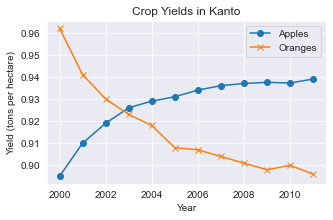

In [35]:
#line chart
years = range(2000, 2012)
apples = [0.895, 0.91, 0.919, 0.926, 0.929, 0.931, 0.934, 0.936, 0.937, 0.9375, 0.9372, 0.939]
oranges = [0.962, 0.941, 0.930, 0.923, 0.918, 0.908, 0.907, 0.904, 0.901, 0.898, 0.9, 0.896, ]

"""
SHIFT+TAB to check documentation

color -> c=
linestyle -> ls=
linewidth -> lw=
markersize -> ms=
markeredgecolor -> mec=
maekeredgewidth -> mew=
markerfacecolor -> mfc=
opacity -> alpha=
"""
def make_graph():                             # to use multiple times later
    plt.figure(figsize=(5, 3))
    plt.plot(years, apples, marker='o') 
    plt.plot(years, oranges, marker='x')
    plt.xlabel('Year')
    plt.ylabel('Yield (tons per hectare)')
    plt.title("Crop Yields in Kanto")
    plt.legend(['Apples', 'Oranges']);        # ';' doesnt give any unintended output with matplotlib and seaborn
    
make_graph()

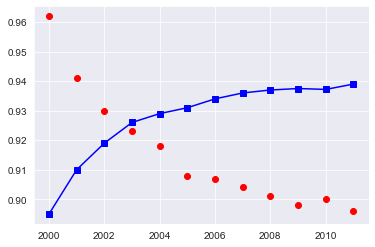

In [36]:
"""
fmt = '[marker][line][color]' -> most used so you can put them in single String
no fmt, 1 argument -> always marker, can put it in single String
"""

plt.plot(years, apples, 's-b')
plt.plot(years, oranges, 'or');

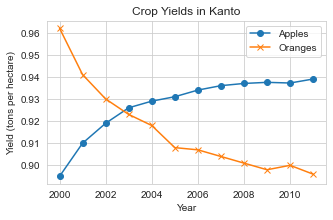

In [37]:
sns.set_style("whitegrid") # when a style is set, its permanently
make_graph();

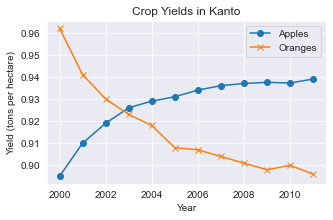

In [41]:
sns.set_style("darkgrid")
make_graph();

In [ ]:
# to change standards in matplotlib library
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## 5.2 Scatter Plots (investigating correlations)

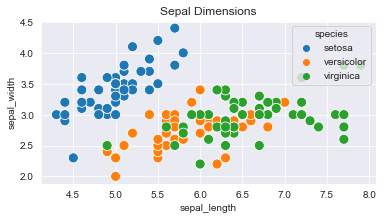

In [44]:
# Load data into a Pandas dataframe
flowers_df = sns.load_dataset("iris") # default dataset, not seperate csv

plt.figure(figsize=(6, 3))
plt.title('Sepal Dimensions')
sns.scatterplot(x=flowers_df.sepal_length, y=flowers_df.sepal_width, hue=flowers_df.species, s=100);

## 5.3 Histogram (how many of each variable in a range)

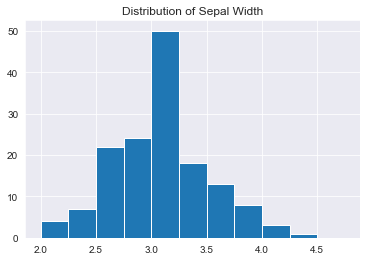

In [46]:
import numpy as np

plt.title("Distribution of Sepal Width")
plt.hist(flowers_df.sepal_width, bins=np.arange(2, 5, 0.25));  # bins are the groupings on x axis

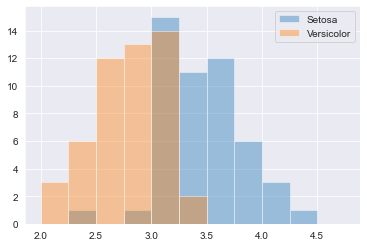

In [49]:
setosa_df = flowers_df[flowers_df.species == 'setosa']
versicolor_df = flowers_df[flowers_df.species == 'versicolor']
virginica_df = flowers_df[flowers_df.species == 'virginica']

plt.hist(setosa_df.sepal_width, alpha=0.4, bins=np.arange(2, 5, 0.25));
plt.hist(versicolor_df.sepal_width, alpha=0.4, bins=np.arange(2, 5, 0.25));
plt.legend(['Setosa', 'Versicolor']);

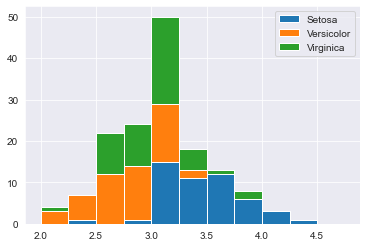

In [48]:
plt.hist([setosa_df.sepal_width, versicolor_df.sepal_width, virginica_df.sepal_width], 
         bins=np.arange(2, 5, 0.25), 
         stacked=True);
plt.legend(['Setosa', 'Versicolor', 'Virginica']);

## 5.4 Bar Charts (comparing individual values)

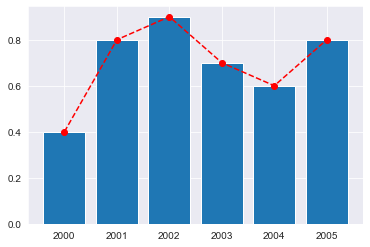

In [51]:
years = range(2000, 2006)
apples = [0.35, 0.6, 0.9, 0.8, 0.65, 0.8]
oranges = [0.4, 0.8, 0.9, 0.7, 0.6, 0.8]

plt.bar(years, oranges);           # horizontal bar chart switch x and y
plt.plot(years, oranges, 'o--r');  # combine with bar chart



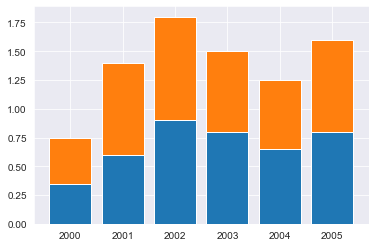

In [53]:
plt.bar(years, apples);
plt.bar(years, oranges, bottom=apples);  # draw oranges with apples on the bottom

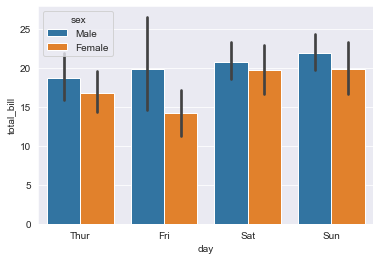

In [54]:
tips_df = sns.load_dataset("tips");
sns.barplot(x='day', y='total_bill', hue='sex', data=tips_df); # barplot extracts from data and makes averages

## 5.5 Heatmap (identifying areas of interest)

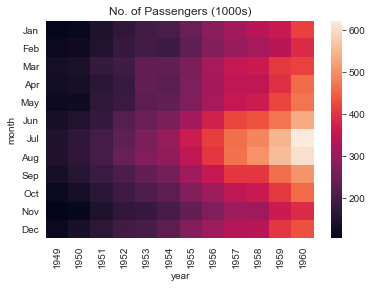

In [55]:
flights_df = sns.load_dataset("flights").pivot("month", "year", "passengers") # passengers with month ifo years

plt.title("No. of Passengers (1000s)")
sns.heatmap(flights_df);

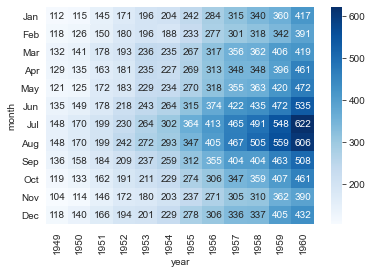

In [63]:
sns.heatmap(flights_df, fmt="d", annot=True, cmap='Blues');  # fmt groups values, annot show values, cmap choose colors

## 5.6 Plotting multiple charts in a grid

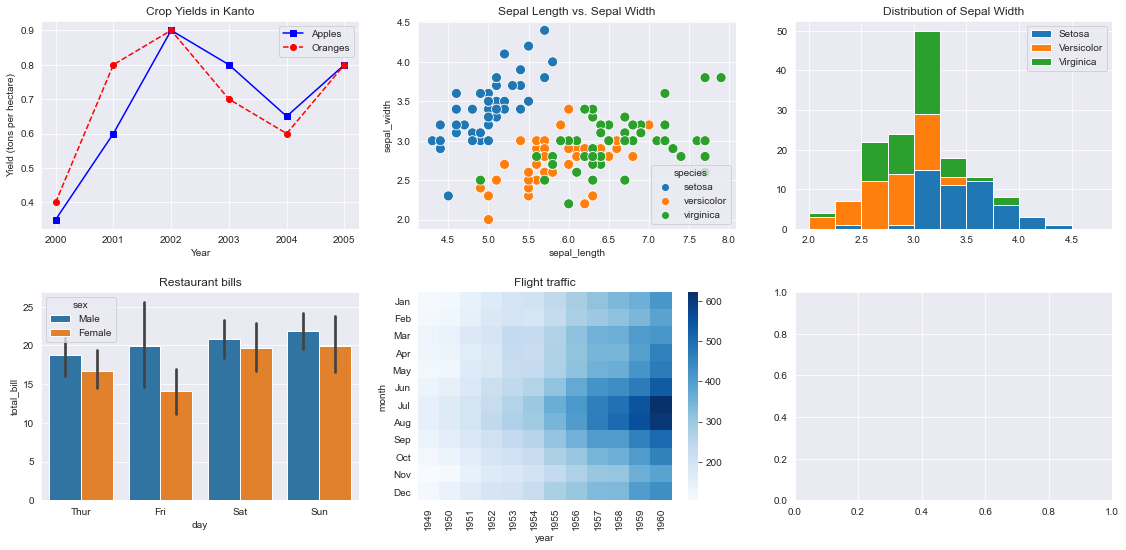

In [66]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8)) # 2 rows, 3 columns, size of each graph

# Plot line chart at place [0,0]
axes[0,0].plot(years, apples, 's-b')
axes[0,0].plot(years, oranges, 'o--r')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Yield (tons per hectare)')
axes[0,0].legend(['Apples', 'Oranges']);
axes[0,0].set_title('Crop Yields in Kanto')

# Scatter plot at place [0,1]
axes[0,1].set_title('Sepal Length vs. Sepal Width')
sns.scatterplot(x=flowers_df.sepal_length, 
                y=flowers_df.sepal_width, 
                hue=flowers_df.species, 
                s=100, 
                ax=axes[0,1]);

# Bar chart at place [0,2]
axes[0,2].set_title('Distribution of Sepal Width')
axes[0,2].hist([setosa_df.sepal_width, versicolor_df.sepal_width, virginica_df.sepal_width], 
         bins=np.arange(2, 5, 0.25), 
         stacked=True);
axes[0,2].legend(['Setosa', 'Versicolor', 'Virginica']);

# Barplot chart at place [1,0]
axes[1,0].set_title('Restaurant bills')
sns.barplot(x='day', y='total_bill', hue='sex', data=tips_df, ax=axes[1,0]);

# Heatmap at place [1,0]
axes[1,1].set_title('Flight traffic')
sns.heatmap(flights_df, cmap='Blues', ax=axes[1,1]);

# Space between graphs
plt.tight_layout(pad=2);

## 5.7 Inspiration

Matplotlib tutorial: https://github.com/rougier/matplotlib-tutorial

Matplotlib gallery: https://matplotlib.org/3.1.1/gallery/index.html

Seaborn gallery: https://seaborn.pydata.org/examples/index.html

Data Visualization cheat sheet: https://jovian.ml/aakashns/dataviz-cheatsheet